# Understand the Normal Curve
## Mini-Lab: Characteristics of the Normal Curve

Welcome to your next mini-lab! Go ahead an run the following cell to get started. You can do that by clicking on the cell and then clickcing `Run` on the top bar. You can also just press `Shift` + `Enter` to run the cell.

In [1]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

Rather than a traditional mini-lab format with graded questions, this mini-lab is more akin to an exploratory analysis of normal curves and similar content, kind of like the interactive content we've supplied you during your educational journey.

In the previous lab, we've bootstrapped and created a confidence interval of novel COVID-19 test cases. For this demonstration go ahead and replace the relevant cells below with your solution from the previous lab.

In [2]:
def proportion_positive(test_results):
    numerator = np.count_nonzero(test_results == "positive")
    denominator = len(test_results)
    return numerator / denominator


def sample_population(population_table):
    sampled_population = population_table.sample()
    return sampled_population


def apply_statistic(sample_table, column_name, statistic_function):
    return statistic_function(sample_table.column(column_name))


def bootstrap(sample_table, column_name, test_statistic):
    resampled_table = sample_table.sample()
    return apply_statistic(resampled_table, column_name, test_statistic)

In [3]:
new_tests = Table().read_table("../datasets/new_covid19_village_tests.csv")
new_tests.show(5)

COVID-19 Test Result
negative
positive
negative
negative
negative


The following cell will take the bootstrap code and put it in a function for ease of use. You will be running this function over and over again so it's best to make things as simple as possible.

In [4]:
def full_bootstrap_simulation(iterations):
    bootstrap_samples = make_array()

    for iteration in np.arange(iterations):
        bootstrap_result = bootstrap(new_tests, "COVID-19 Test Result", proportion_positive)
        bootstrap_samples = np.append(bootstrap_samples, bootstrap_result)
        
    simulation_table = Table().with_column("Bootstrap Test Statistics", bootstrap_samples)
    simulation_table.hist(bins=np.arange(0.225, 0.375, 0.006));

Now that everything is running and imported go ahead and run the function below. Change the number of iterations every time to something much smaller and much larger (though if you use a ridiculously large number, it may take some time to render.)

What changes specifically and how does it change? What about the smoothness of the curve? How does the maximum `Percent per unit` change as you increase or decrease the number of iterations?

Do you notice anything interesting about our normal curve when you use a large number such as 100,000? If I told you that the true mean is 0.268, would that explain any phenomena in the graph?

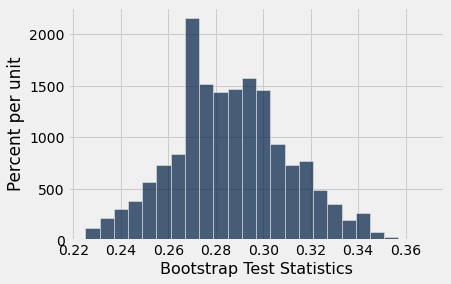

In [5]:
full_bootstrap_simulation(1000)

Feel free to tinker around with the `full_bootstrap_simulation` function as well as the test statistic being used. Feel free also to import different data or to create your own data!